## Binary Classification on IMDb Dataset

The provided code demonstrates binary classification on the IMDb dataset, aiming to distinguish between positive and negative reviews. Here's a concise explanation:

- The `imdb.load_data` function is used to load the IMDb movie reviews dataset. The parameter `num_words` limits the vocabulary size to the most frequent 10,000 words, ensuring manageable input data.

- The dataset is divided into training and testing subsets. `train_data` and `train_labels` contain the training reviews and their corresponding labels (0 for negative, 1 for positive).

- Similarly, `test_data` and `test_labels` store the testing reviews and labels, allowing the model's performance to be evaluated on unseen data.

This code sets the stage for a binary classification task where the model learns to classify movie reviews as positive or negative based on their textual content.

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

2023-08-25 14:41:38.968607: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-25 14:41:39.475373: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-25 14:41:39.478552: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 14:41:41.842389: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Decoding IMDb Review

The following code snippet decodes an IMDb review from its integer-encoded format back into human-readable text. Here's a concise explanation:

- `word_index` is obtained using `imdb.get_word_index()`. This dictionary maps words to their integer indices in the IMDb dataset.

- `reverse_word_index` is created by reversing the `word_index` dictionary, mapping integer indices back to words.

- A specific review, in this case, `train_data[0]`, is taken from the training dataset.

- The list comprehension `[reverse_word_index.get(i - 3, '?') for i in train_data[0]]` decodes the review by converting each integer index in the review to its corresponding word using the `reverse_word_index`. An offset of 3 is subtracted to handle reserved indices, and any unknown words are represented as `?`.

- The decoded words are then joined into a single string, representing the human-readable version of the original review.

This process allows us to understand the content of a review that has been transformed into a sequence of integer indices.

In [4]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

## Vectorizing Data for Model Input

- The `vectorize_sequences` function is defined to convert sequences of integers into a binary matrix. The `dimension` parameter specifies the size of the vocabulary.

- For each sequence in the input `sequences`, a binary matrix is created with dimensions `(len(sequences), dimension)`. Each row of the matrix corresponds to a sequence, and the columns represent the vocabulary words.

- In each row, the indices specified by the sequence are set to 1, indicating the presence of those words in the text.

- The resulting binary matrix, representing the vectorized sequences, is returned by the function.

- `x_train` and `x_test` are obtained by applying the `vectorize_sequences` function to the training and testing data, respectively.

- `y_train` and `y_test` are created by converting the label arrays (`train_labels` and `test_labels`) to `float32` data type using `np.asarray`.

This preprocessing step prepares the textual data in a format suitable for input into a neural network model, where each review is represented as a binary vector encoding the presence of words from the vocabulary.

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')

y_test = np.asarray(test_labels).astype('float32')

## Neural Network Architecture

- The `model` is created as a `keras.Sequential` object, representing a linear stack of layers.

- Four fully connected (`Dense`) layers are added to the model. Each layer has 64 units and uses the ReLU activation function (`activation='relu'`). The ReLU activation function introduces non-linearity to the model, allowing it to learn complex patterns in the data.

- The final `Dense` layer consists of a single unit and uses the sigmoid activation function (`activation='sigmoid'`). This layer is often used in binary classification tasks to output probabilities between 0 and 1, indicating the likelihood of a positive class.

This architecture defines a deep neural network with multiple hidden layers, which can capture intricate relationships in the data. It concludes with a sigmoid-activated output layer that provides a probability estimate for binary classification.

In [32]:
from tensorflow import keras
from tensorflow.keras import layers 

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])



## Compiling the Model

- The `compile` method is called on the `model` object to configure its training process.

- The `optimizer` is set to `'rmsprop'`, which stands for Root Mean Square Propagation. This optimizer adjusts the learning rate during training to improve convergence speed and accuracy.

- The `loss` function is specified as `'binary_crossentropy'`. This loss function is commonly used for binary classification tasks and measures the difference between predicted probabilities and actual labels.

- The `metrics` parameter is set to `['accuracy']`, indicating that the accuracy metric should be computed during training to evaluate model performance.

This compilation step prepares the model for training by defining the optimization algorithm, loss function, and evaluation metrics.

In [33]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

## Data Splitting for Validation

- `x_val` is obtained by selecting the first 10,000 samples from `x_train`. This subset will be used for validation during training to monitor the model's performance on unseen data.

- `partial_x_train` is obtained by excluding the first 10,000 samples from `x_train`. This subset will be used for partial training, allowing the model to learn from a larger portion of the training data.

- Similarly, `y_val` and `partial_y_train` are created by splitting the corresponding label arrays, `y_train`, in the same manner.

This splitting strategy ensures that the model is trained on a larger portion of the data while still having a separate subset for validation, aiding in tuning hyperparameters and detecting overfitting.

In [34]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Model Training

- The `fit` method is called on the `model` object to initiate the training process.

- `partial_x_train` and `partial_y_train` are used as the training data and labels, respectively. These subsets were created earlier for partial training.

- The `epochs` parameter is set to 4, indicating that the model will be trained for a total of 4 iterations through the training data.

- The `batch_size` parameter is set to 512, determining the number of samples used in each iteration of the training process.

- The `validation_data` parameter is provided as `(x_val, y_val)`, representing the validation data and labels. The model's performance on this validation set will be monitored during training.

The `fit` method trains the model, adjusting its parameters based on the training data and minimizing the specified loss function. The validation data helps in monitoring potential overfitting and gauging the model's generalization ability.

In [35]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 3s 68ms/step - loss: 0.5305 - accuracy: 0.7279 - val_loss: 0.4136 - val_accuracy: 0.8210
Epoch 2/4
30/30 [==============================] - 1s 48ms/step - loss: 0.3068 - accuracy: 0.8839 - val_loss: 0.2921 - val_accuracy: 0.8821
Epoch 3/4
30/30 [==============================] - 1s 44ms/step - loss: 0.2317 - accuracy: 0.9141 - val_loss: 0.2758 - val_accuracy: 0.8880
Epoch 4/4
30/30 [==============================] - 1s 44ms/step - loss: 0.1798 - accuracy: 0.9323 - val_loss: 0.2900 - val_accuracy: 0.8842


## Visualizing Training and Validation Loss

- The `history_dict` variable contains the training history recorded during the training process, which includes the training and validation loss values for each epoch.

- `loss_values` and `val_loss_values` are extracted from the `history_dict` to access the training loss and validation loss values, respectively.

- The x-axis of the plot represents the number of epochs, and the y-axis represents the loss values.

- Blue dots (`'bo'`) depict the training loss at each epoch, while a blue solid line (`'b'`) represents the validation loss.

- The plot's title is omitted for brevity, but typically it would indicate the loss trends during training.

By visualizing the training and validation loss, you can gain insights into the model's performance and whether it is overfitting or underfitting. The convergence and divergence of the loss curves provide valuable information about the effectiveness of the training process.

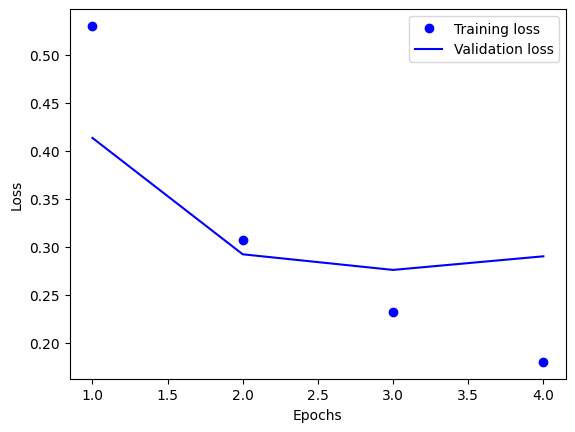

In [36]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Visualizing Training and Validation Accuracy

- `plt.clf()` is used to clear any previous plots, ensuring a fresh canvas for the new visualization.

- `acc_values` and `val_acc_values` are extracted from the `history_dict` to access the training accuracy and validation accuracy values, respectively.

- Similar to the previous plot, the x-axis represents the number of epochs, and the y-axis represents the accuracy values.

- Blue dots (`'bo'`) indicate the training accuracy at each epoch, and a blue solid line (`'b'`) represents the validation accuracy.

- The plot's title is omitted for brevity, but it would typically indicate the accuracy trends during training.

It's essential to strike a balance between training long enough to capture meaningful patterns and stopping early to avoid overfitting. This balance might require experimentation and monitoring the training and validation curves to make informed decisions about the optimal number of epochs for your specific model and dataset.

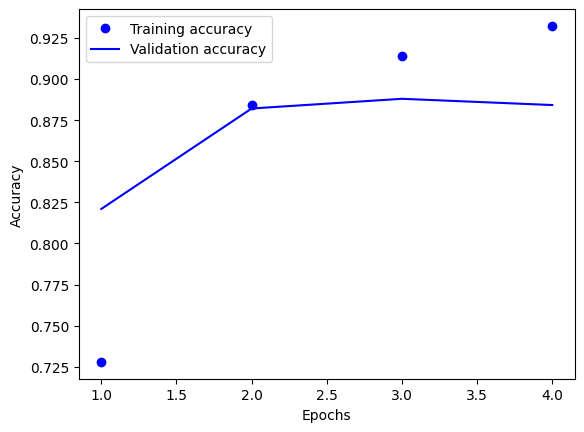

In [37]:
plt.clf() # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
